<h3><b>Algorytm KMeans opiera się o wyznaczenie centroidów minimalizujących odległość w klastrach(poszczególnych grupach obserwacji)</b></h3>
<hr/>
<b>Funkcja kosztu - czyli ta, którą należy minimalizować - w tym wypadku jest sumaryczną odległością pomiędzy punktami przynależącymi do klastra, a jego centroidem. Pierwiastek z kwadratu różnic może zostać pomnięty, ponieważ jest to funkcja monotoniczna rosnąca - wraz ze wzrostem argumentu, wartoć funkcji wzrasta</b>
<br />

$$D(c) = \sum_{i=1}^{n}(x_i - c)^2$$
$$gdzie\: n\: -\: ilosc\: obserwacji\: przypisanych\: do\: klastra\:, c\: -\: centroid\:, x_i\: -\: pojedyncza\: obserwacja\:$$

<hr/>
<br/>
<b>Poniżej pochodna funkcji kosztu(pozwalająca znaleźć jej ekstremum). Jest to funkcja kwadratowa, więc możemy spodziewać się jednego ekstremum, które będzie jej wartością minimalną.</b>
<br/>

$$D(c) = (x_1 - c)^2 + (x_2 - c)^2 + ... + (x_n - c)^2$$
$$D'(c) = -2(x_1 - c) + [-2(x_2 -c)^2] + ... + [-2(x_n - c)^2]$$
$$D'(c) = -2[(x_1 - c) + (x_2 - c) + ... + (x_n - c)]$$
$$D'(c) = -2[x_1 + x_2 + ... + x_n - nc]$$
$$D'(c) = -2(x_1 + x_2 + ... + x_n) + 2nc$$
$$D'(c) = 0\: (ekstremum)$$
$$0 = -2(x_1 + x_2 + ... + x_n) + 2nc$$
$$ c = \frac{1}{n}(x_1 + x_2 + ... + x_n)$$
<p><b>Oznacza to, że położenie centroidu powinno być wynikiem uśrednienia położenia punktów przynależących do konkretnych klastrów</b></p>
<hr/>
<br/>
<p><b>Algorytm KMeans opiera się więc o</b></p>
<p> 1. Obliczenie przynelażności do danych centroidów</p>
<p> 2. Centrowanie (wyżej wskazane uśrednianie)</p>
<p> 3. Powrót do punktu 1, jeśli nie zostało spełnione kryterium stopu (przykładowo - brak zmian w przypisanu do klastrów)</p>

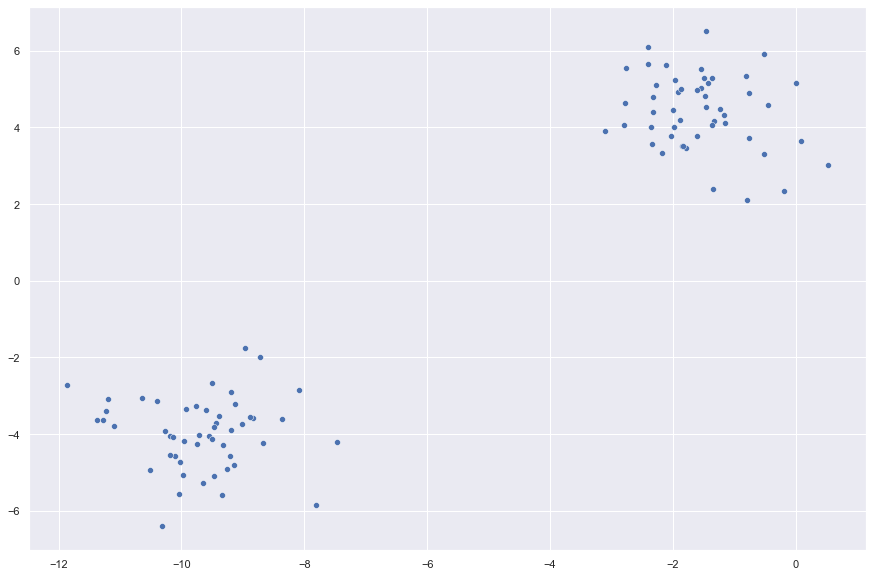

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

X, y = make_blobs(n_samples = 100, centers = 2, n_features = 2, random_state = 1)
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], ax = ax)
plt.show()

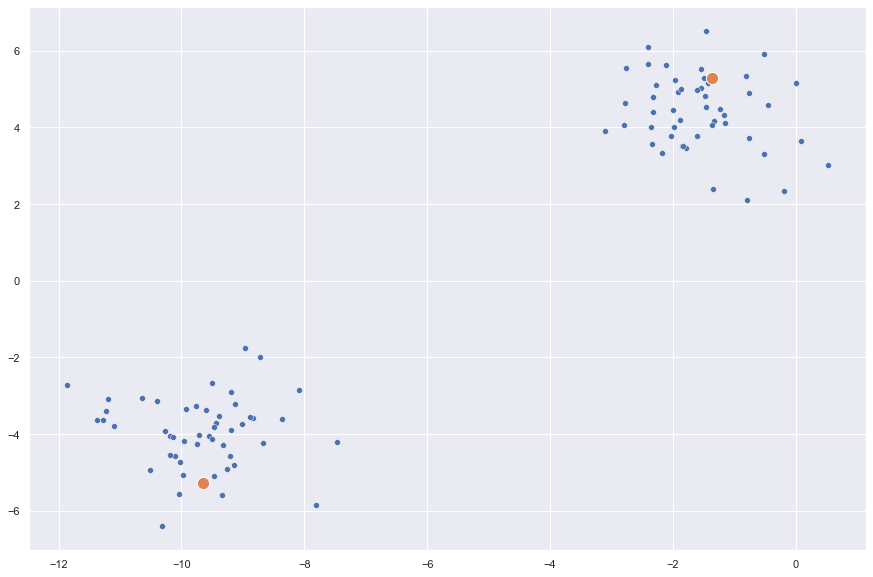

In [2]:
import numpy as np
c1 = X[97]
c2 = X[41]

centers = np.asarray([c1, c2])
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], ax = ax)
sns.scatterplot(x = centers[:, 0], y = centers[:, 1], s = 150)
plt.show()

In [3]:
import math
def distance(x1, x2):
    return sum([(xi - xj) ** 2 for xi, xj in zip(x1, x2)])

In [4]:
points_c1 = []
points_c2 = []

for i, x in enumerate(X):
    points_c1.append([i, distance(x, c1)])
    points_c2.append([i, distance(x, c2)])

In [5]:
import pandas as pd
points_c1 = pd.DataFrame(points_c1, columns = ["point_index", "distance_to_c1"])
points_c2 = pd.DataFrame(points_c2, columns =["point_index", "distance_to_c2"])

In [6]:
points_c1 = points_c1.set_index("point_index")
points_c2 = points_c2.set_index("point_index")

In [7]:
df = points_c1.join(points_c2).reset_index()

In [8]:
df["c1"] = df["distance_to_c1"] < df["distance_to_c2"]

In [9]:
df["c2"] = df["distance_to_c2"] < df["distance_to_c1"]

In [10]:
c1_x = sum([X[i][0] for i in df[df["c1"] == True]["point_index"]]) / df[df["c1"] == True]["point_index"].count()
c1_y = sum([X[i][1] for i in df[df["c1"] == True]["point_index"]]) / df[df["c1"] == True]["point_index"].count()

In [11]:
c1 = [c1_x, c1_y]

In [12]:
c2_x = sum([X[i][0] for i in df[df["c2"] == True]["point_index"]]) / df[df["c2"] == True]["point_index"].count()
c2_y = sum([X[i][1] for i in df[df["c2"] == True]["point_index"]]) / df[df["c2"] == True]["point_index"].count()

In [13]:
c2 = [c2_x, c2_y]

In [14]:
c2

[-9.681177100524485, -3.9713794295185854]

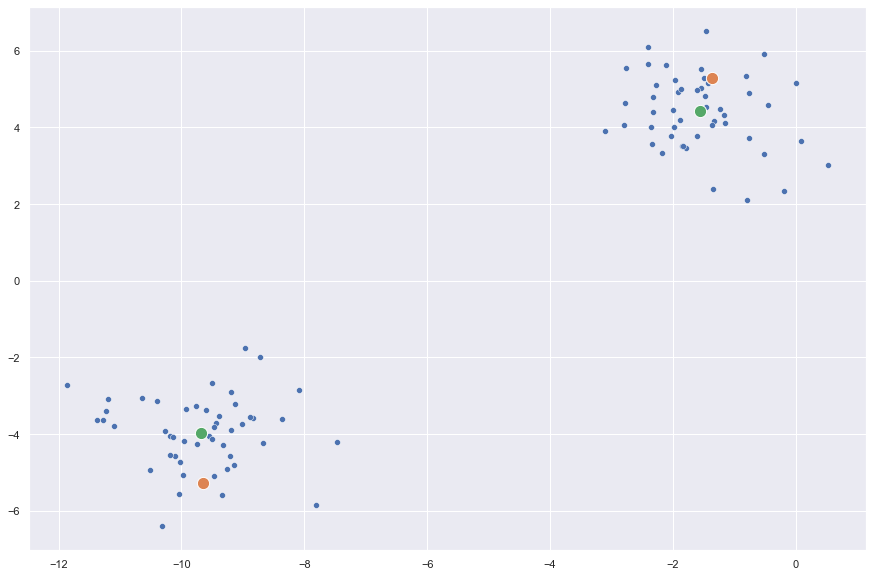

In [15]:
centers_v2 = np.asarray([c1, c2])
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], ax = ax)
sns.scatterplot(x = centers[:, 0], y = centers[:, 1], s = 150, ax = ax)
sns.scatterplot(x = centers_v2[:, 0], y = centers_v2[:, 1], s = 150, ax = ax)
plt.show()


<p><b>Punkty zielone są centroidami po jednym centorowaniu</b></p>
<p><b>Pomarańczowe - poprzednie centroidy</b></p>

<p><b>Problematycznym jest określenie początkowych punktów centroidów - moga być one losowe, jednakże przy zastosowaniu algorytmu KMeans++ jesteśmy w stanie uzyskać lepsze wyniki</b></p>
$$Opiera\: sie\: on\: o:\: $$
$$1.\: Losowy\: wybor\: centroidu\: pierwszego$$
$$2\: Wybor\: srodka\: nastepnego\: klastra\: ze\: zbioru\: punktow\: x\: wg.\: wzoru\: \frac{D(x)^2}{\sum_{i = 1}^n D(x_i)^2}, gdzie\: n\: -\: liczebnosc\: zbioru\: x, D(x)\: -\: najkrotsza\: odleglosc\: do\: juz\: zdefiniowanego\: centoridu$$
$$3.\: Kontynujemy\: punkt\: 2\: az\: do\: uzyskania\: zdefiniowanej\: liczby\: centroidow\:$$
$$4.\: Centrowanie\: odbywa\: sie\: przy\: uzyciu\: standardowego\: algorytmu\: KMeans$$

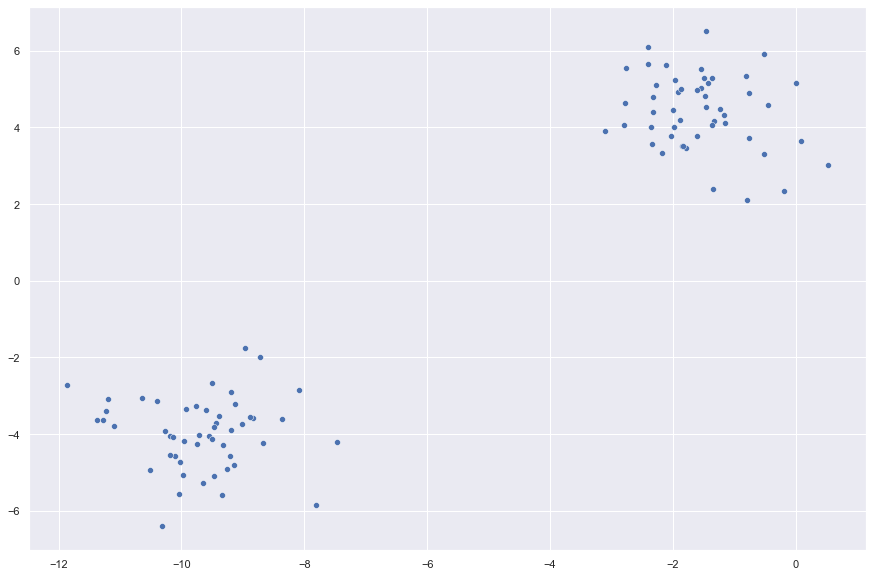

In [16]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], ax = ax)
plt.show()

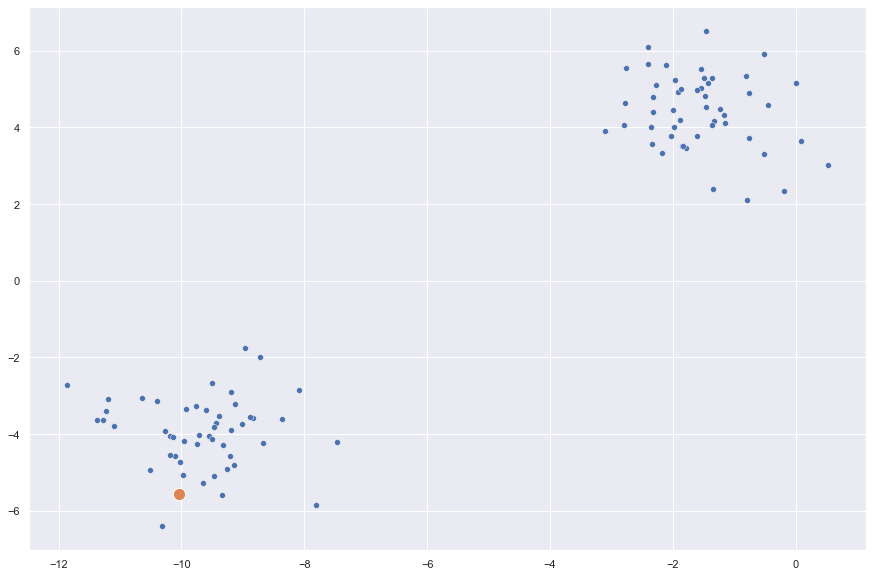

In [17]:
c1 = list(X).pop(10)
centers = np.asarray([c1])
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], ax = ax)
sns.scatterplot(x = centers[:, 0], y = centers[:, 1], ax = ax, s = 150)
plt.show()

In [18]:
import math

distances = []
for i, x in enumerate(X):
    distances.append((i, math.sqrt(distance(x, c1))))

distances = [(i, x**2) for i, x in distances]
sum_d = sum([d[1] for d in distances])
c2_index = max([(d / sum_d, i) for i, d in distances])[1]
centers = [c1, X[c2_index]]
centers = np.asarray(centers)

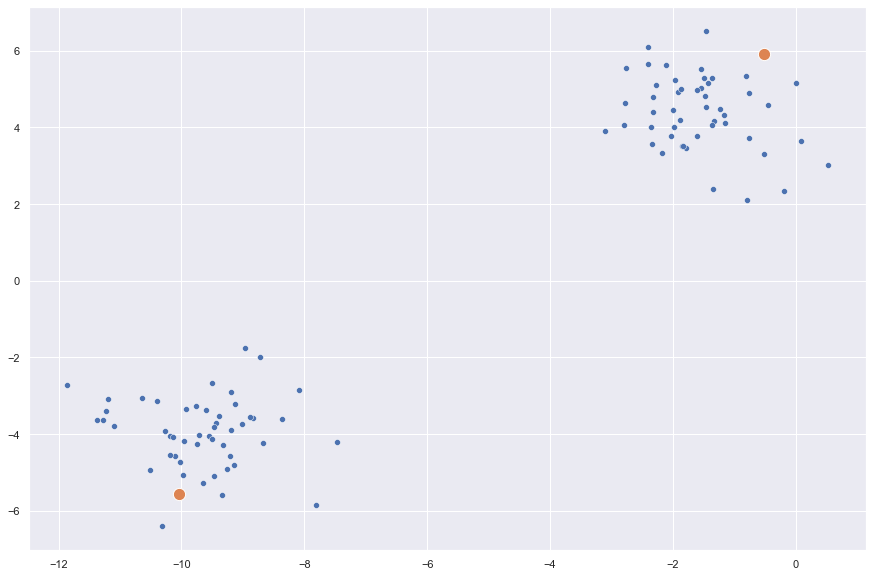

In [19]:
fig, ax = plt.subplots(figsize = (15, 10))
sns.scatterplot(x = X[:, 0], y = X[:, 1], ax = ax)
sns.scatterplot(x = centers[:, 0], y = centers[:, 1], ax = ax, s = 150)
plt.show()

In [ ]:
!jbcn